In [11]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from statsmodels.tsa.stattools import grangercausalitytests

In [65]:
#Read excel files
file_name_dji = "data/Dow Jones Industrial Average.xlsx"
file_name_exchange_rate = "data/The nominal effective exchange rate.xlsx"

#start_time = datetime.datetime(2008, 8, 1)
#end_time = datetime.datetime(2017, 8, 1)
start_time = "2008-08-01"
end_time = "2017-08-01"

#Read data from files
dji =  pd.read_excel(file_name_dji,dtype=np.float64,header=0,parse_dates=['Date'],index_col='Date').sort_index()
exchange_rate = pd.read_excel(file_name_exchange_rate,dtype=np.float64,header=0,parse_dates=['Date'],index_col='Date').sort_index().dropna()

#Get the data between given interval of time 
dji_interval=dji.loc[start_time:end_time]
exchange_rate_interval=exchange_rate.loc[start_time:end_time]

# merge by date indexes to get intersection part of dji and exchange rates
df_merge=pd.merge(dji_interval,exchange_rate_interval, how='inner', left_index=True, right_index=True)






In [67]:
df_merge.dtypes
print(df_merge)

                 DJI   China  Japan   Korea  Chinese Taipei  United States
Date                                                                      
2008-08-01  11326.32   94.74  77.64  112.65          102.62          94.00
2008-08-04  11284.15   94.72  77.20  112.66          102.83          94.07
2008-08-05  11615.77   94.86  77.59  112.75          102.76          94.36
2008-08-06  11656.07   95.08  77.01  113.18          102.80          94.41
2008-08-07  11431.43   95.09  76.64  113.24          102.47          94.62
...              ...     ...    ...     ...             ...            ...
2017-07-26  21711.01  114.87  84.14  115.06          114.22         117.14
2017-07-27  21796.55  114.76  84.24  115.29          114.41         116.70
2017-07-28  21830.31  114.75  84.53  114.37          114.18         116.86
2017-07-31  21891.12  114.92  84.87  114.34          114.21         116.71
2017-08-01  21963.92  114.85  84.81  114.14          113.99         116.47

[2266 rows x 6 columns]


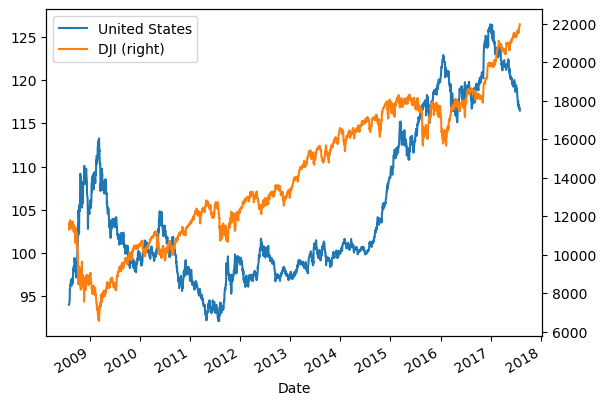

In [86]:
plt=df_merge.plot(y=["United States","DJI"],secondary_y=["DJI"])


In [70]:
grangercausalitytests(df_merge[['DJI', 'United States']], maxlag=2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8609  , p=0.3536  , df_denom=2262, df_num=1
ssr based chi2 test:   chi2=0.8620  , p=0.3532  , df=1
likelihood ratio test: chi2=0.8619  , p=0.3532  , df=1
parameter F test:         F=0.8609  , p=0.3536  , df_denom=2262, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.4820  , p=0.2274  , df_denom=2259, df_num=2
ssr based chi2 test:   chi2=2.9705  , p=0.2264  , df=2
likelihood ratio test: chi2=2.9685  , p=0.2267  , df=2
parameter F test:         F=1.4820  , p=0.2274  , df_denom=2259, df_num=2


{1: ({'ssr_ftest': (0.8608861934746989, 0.3535898064204688, 2262.0, 1),
   'ssr_chi2test': (0.8620279523519864, 0.3531718051770263, 1),
   'lrtest': (0.861863955949957, 0.35321760198229657, 1),
   'params_ftest': (0.8608861934736142, 0.35358980642082005, 2262.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (1.4819572011371396, 0.22741338193091948, 2259.0, 2),
   'ssr_chi2test': (2.9704746377817473, 0.22644859377002952, 2),
   'lrtest': (2.968527639310196, 0.22666914864058774, 2),
   'params_ftest': (1.48195720113746, 0.22741338193088287, 2259.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}

In [71]:
grangercausalitytests(df_merge[['United States', 'DJI']], maxlag=2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.2016  , p=0.1380  , df_denom=2262, df_num=1
ssr based chi2 test:   chi2=2.2045  , p=0.1376  , df=1
likelihood ratio test: chi2=2.2035  , p=0.1377  , df=1
parameter F test:         F=2.2016  , p=0.1380  , df_denom=2262, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=80.0020 , p=0.0000  , df_denom=2259, df_num=2
ssr based chi2 test:   chi2=160.3581, p=0.0000  , df=2
likelihood ratio test: chi2=154.9337, p=0.0000  , df=2
parameter F test:         F=80.0020 , p=0.0000  , df_denom=2259, df_num=2


{1: ({'ssr_ftest': (2.2016274034924055, 0.1380044401011416, 2262.0, 1),
   'ssr_chi2test': (2.204547333735764, 0.13760428128910232, 1),
   'lrtest': (2.2034751753021737, 0.13769999346250617, 1),
   'params_ftest': (2.2016274034924193, 0.1380044401011416, 2262.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (80.00198035405928, 2.6969092968466282e-34, 2259.0, 2),
   'ssr_chi2test': (160.35810847418344, 1.508965048817262e-35, 2),
   'lrtest': (154.933741656037, 2.2728222331411227e-34, 2),
   'params_ftest': (80.00198035320162, 2.6969092990064556e-34, 2259.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}

In [52]:
#
grangercausalitytests(df_merge[['DJI', 'United States']], maxlag=2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8609  , p=0.3536  , df_denom=2262, df_num=1
ssr based chi2 test:   chi2=0.8620  , p=0.3532  , df=1
likelihood ratio test: chi2=0.8619  , p=0.3532  , df=1
parameter F test:         F=0.8609  , p=0.3536  , df_denom=2262, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.4820  , p=0.2274  , df_denom=2259, df_num=2
ssr based chi2 test:   chi2=2.9705  , p=0.2264  , df=2
likelihood ratio test: chi2=2.9685  , p=0.2267  , df=2
parameter F test:         F=1.4820  , p=0.2274  , df_denom=2259, df_num=2


{1: ({'ssr_ftest': (0.8608861934746989, 0.3535898064204688, 2262.0, 1),
   'ssr_chi2test': (0.8620279523519864, 0.3531718051770263, 1),
   'lrtest': (0.861863955949957, 0.35321760198229657, 1),
   'params_ftest': (0.8608861934736142, 0.35358980642082005, 2262.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (1.4819572011371396, 0.22741338193091948, 2259.0, 2),
   'ssr_chi2test': (2.9704746377817473, 0.22644859377002952, 2),
   'lrtest': (2.968527639310196, 0.22666914864058774, 2),
   'params_ftest': (1.48195720113746, 0.22741338193088287, 2259.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}

In [54]:
grangercausalitytests(df_merge[['United States', 'DJI']], maxlag=2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.2016  , p=0.1380  , df_denom=2262, df_num=1
ssr based chi2 test:   chi2=2.2045  , p=0.1376  , df=1
likelihood ratio test: chi2=2.2035  , p=0.1377  , df=1
parameter F test:         F=2.2016  , p=0.1380  , df_denom=2262, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=80.0020 , p=0.0000  , df_denom=2259, df_num=2
ssr based chi2 test:   chi2=160.3581, p=0.0000  , df=2
likelihood ratio test: chi2=154.9337, p=0.0000  , df=2
parameter F test:         F=80.0020 , p=0.0000  , df_denom=2259, df_num=2


{1: ({'ssr_ftest': (2.2016274034924055, 0.1380044401011416, 2262.0, 1),
   'ssr_chi2test': (2.204547333735764, 0.13760428128910232, 1),
   'lrtest': (2.2034751753021737, 0.13769999346250617, 1),
   'params_ftest': (2.2016274034924193, 0.1380044401011416, 2262.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (80.00198035405928, 2.6969092968466282e-34, 2259.0, 2),
   'ssr_chi2test': (160.35810847418344, 1.508965048817262e-35, 2),
   'lrtest': (154.933741656037, 2.2728222331411227e-34, 2),
   'params_ftest': (80.00198035320162, 2.6969092990064556e-34, 2259.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}

number of lags (no zero) 1：当lags为1时的检测结果
ssr based F test：残差平方和F检验
ssr based chi2 test：残差平方和卡方检验
likelihood ratio test：似然比检验结果
parr F testamete：参数 F 检验结果